# IS 445 Final Project Part 1

### Deyi Zhang 12-09-2022

url to the dataset: https://catalog.data.gov/dataset/crash-reporting-drivers-data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import folium
from folium import plugins
from folium.plugins import HeatMap

In [3]:
#Read csv file to dataframe, mark missing values as NA
df = pd.read_csv("crash_data.csv", na_values = ['unknown','Unknown','UNKNOWN','0'])
df.head()

/Users/victordashuaibi/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15.0,No,No,2017.0,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35.0,No,No,2020.0,UNK,UNK,NaN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,NaN,No,No,2010.0,TOYOTA,SUV,NaN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25.0,No,No,2004.0,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25.0,No,No,2006.0,HONDA,CR-V,NaN,39.175230,-77.241090,"(39.17523, -77.24109)"


In [4]:
df.shape

(150895, 43)

In [5]:
#Remove unecessary variables
df = df.drop(['Report Number',
            'Local Case Number',
            'Off-Road Description',
            'Municipality',
            'Related Non-Motorist',
            'Non-Motorist Substance Abuse',
            'Person ID',
            'Circumstance',
            'Vehicle ID',
            'Driverless Vehicle',
            'Parked Vehicle',
            'Equipment Problems',
            'Vehicle First Impact Location',
            'Vehicle Second Impact Location',
            'Road Name',
            'Cross-Street Name'], axis='columns')
df.head()

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Cross-Street Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,...,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NaN,...,OTHER,South,South,15.0,2017.0,THOMAS,BUS,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,County,OTHER,CLOUDY,DRY,NaN,NaN,...,NaN,NaN,NaN,35.0,2020.0,UNK,UNK,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,...,BACKING,North,West,NaN,2010.0,TOYOTA,SUV,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,County,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,...,ACCELERATING,East,East,25.0,2004.0,DODGE,GRAND CARAVAN,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,County,OTHER,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,...,NaN,North,North,25.0,2006.0,HONDA,CR-V,39.175230,-77.241090,"(39.17523, -77.24109)"


In [6]:
#Check number of null values
df.isna().sum()

Agency Name                   0
ACRS Report Type              0
Crash Date/Time               0
Route Type                14780
Cross-Street Type         26193
Collision Type             1128
Weather                   12418
Surface Condition         18158
Light                      1856
Traffic Control           23111
Driver Substance Abuse    37666
Driver At Fault            3927
Injury Severity               0
Driver Distracted By      28224
Drivers License State      8224
Vehicle Damage Extent      5888
Vehicle Body Type          3182
Vehicle Movement           2725
Vehicle Continuing Dir     7269
Vehicle Going Dir          6734
Speed Limit                4183
Vehicle Year               3419
Vehicle Make               3179
Vehicle Model              3329
Latitude                      0
Longitude                     0
Location                      0
dtype: int64

In [7]:
#Check percent of null values
df.isna().sum()*100/len(df)

Agency Name                0.000000
ACRS Report Type           0.000000
Crash Date/Time            0.000000
Route Type                 9.794890
Cross-Street Type         17.358428
Collision Type             0.747540
Weather                    8.229564
Surface Condition         12.033533
Light                      1.229994
Traffic Control           15.315948
Driver Substance Abuse    24.961728
Driver At Fault            2.602472
Injury Severity            0.000000
Driver Distracted By      18.704397
Drivers License State      5.450147
Vehicle Damage Extent      3.902051
Vehicle Body Type          2.108751
Vehicle Movement           1.805892
Vehicle Continuing Dir     4.817257
Vehicle Going Dir          4.462706
Speed Limit                2.772126
Vehicle Year               2.265814
Vehicle Make               2.106763
Vehicle Model              2.206170
Latitude                   0.000000
Longitude                  0.000000
Location                   0.000000
dtype: float64

In [8]:
#Drop all null values to prevent them from affecting visualization results
df = df.dropna().reset_index(drop = True)

In [9]:
#Check duplicates
df.duplicated().sum()

1

In [10]:
#Drop duplicates
df = df.drop_duplicates().reset_index(drop = True)

In [11]:
#Compare the shape
df.shape

(65517, 27)

In [12]:
df.dtypes

Agency Name                object
ACRS Report Type           object
Crash Date/Time            object
Route Type                 object
Cross-Street Type          object
Collision Type             object
Weather                    object
Surface Condition          object
Light                      object
Traffic Control            object
Driver Substance Abuse     object
Driver At Fault            object
Injury Severity            object
Driver Distracted By       object
Drivers License State      object
Vehicle Damage Extent      object
Vehicle Body Type          object
Vehicle Movement           object
Vehicle Continuing Dir     object
Vehicle Going Dir          object
Speed Limit               float64
Vehicle Year              float64
Vehicle Make               object
Vehicle Model              object
Latitude                  float64
Longitude                 float64
Location                   object
dtype: object

In [13]:
#Dataframe after cleaning
df.head()

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Cross-Street Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,...,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,Rockville Police Departme,Property Damage Crash,04/21/2020 06:45:00 AM,Municipality,Municipality,SAME DIR REAR END,CLEAR,DRY,DAWN,TRAFFIC SIGNAL,...,STOPPED IN TRAFFIC LANE,West,West,40.0,2018.0,TOYT,4S,39.066925,-77.154085,"(39.066925, -77.154085)"
1,Montgomery County Police,Property Damage Crash,03/24/2020 07:13:00 AM,County,County,SINGLE VEHICLE,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,...,MOVING CONSTANT SPEED,South,South,35.0,2017.0,FORD,EXPLORER,39.131327,-77.083237,"(39.13132667, -77.08323667)"
2,Montgomery County Police,Injury Crash,04/18/2020 03:58:00 PM,Maryland (State),County,SAME DIRECTION SIDESWIPE,CLEAR,DRY,DAYLIGHT,STOP SIGN,...,MOVING CONSTANT SPEED,North,North,30.0,1998.0,MERZ,4S,39.201237,-77.136003,"(39.20123667, -77.13600333)"
3,Montgomery County Police,Property Damage Crash,04/22/2020 07:21:00 AM,Maryland (State),County,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,...,MOVING CONSTANT SPEED,West,West,40.0,2014.0,FORD,EDGE,39.156572,-77.266632,"(39.15657167, -77.26663167)"
4,Montgomery County Police,Property Damage Crash,05/17/2019 05:40:00 AM,US (State),County,SAME DIR REAR END,CLEAR,DRY,DAWN,TRAFFIC SIGNAL,...,SLOWING OR STOPPING,South,South,50.0,2015.0,SUBARU,CROSSTREK,39.073357,-76.955403,"(39.07335682, -76.95540285)"


**Display the heat map of the location of crashes**

In [29]:
table = df[['Latitude','Longitude']]
chicago_coord = (39.066925, -77.154085)
heat_map = folium.Map(location = chicago_coord, zoom_start = 10)
HeatMap(table).add_to(folium.FeatureGroup(name = 'Heat Map').add_to(heat_map))
folium.LayerControl().add_to(heat_map)
display(heat_map)

### In this project, the focus will be on the relationships between the data of location, driving condition, vehicle, and driver.

**Relationship between location and driving condition**

In [33]:
df['Route Type'].value_counts()

Maryland (State)        33601
County                  23207
Municipality             3788
US (State)               3037
Interstate (State)        966
Other Public Roadway      446
Ramp                      256
Government                204
Service Road               12
Name: Route Type, dtype: int64

In [34]:
df['Weather'].value_counts()

CLEAR                       47457
RAINING                      8898
CLOUDY                       7768
SNOW                          652
FOGGY                         274
WINTRY MIX                    154
OTHER                         113
SLEET                          77
SEVERE WINDS                   67
BLOWING SNOW                   54
BLOWING SAND, SOIL, DIRT        3
Name: Weather, dtype: int64

In [36]:
df['Surface Condition'].value_counts()

DRY                       51625
WET                       12845
SNOW                        448
ICE                         410
SLUSH                        72
OTHER                        71
MUD, DIRT, GRAVEL            17
WATER(STANDING/MOVING)       14
OIL                          13
SAND                          2
Name: Surface Condition, dtype: int64

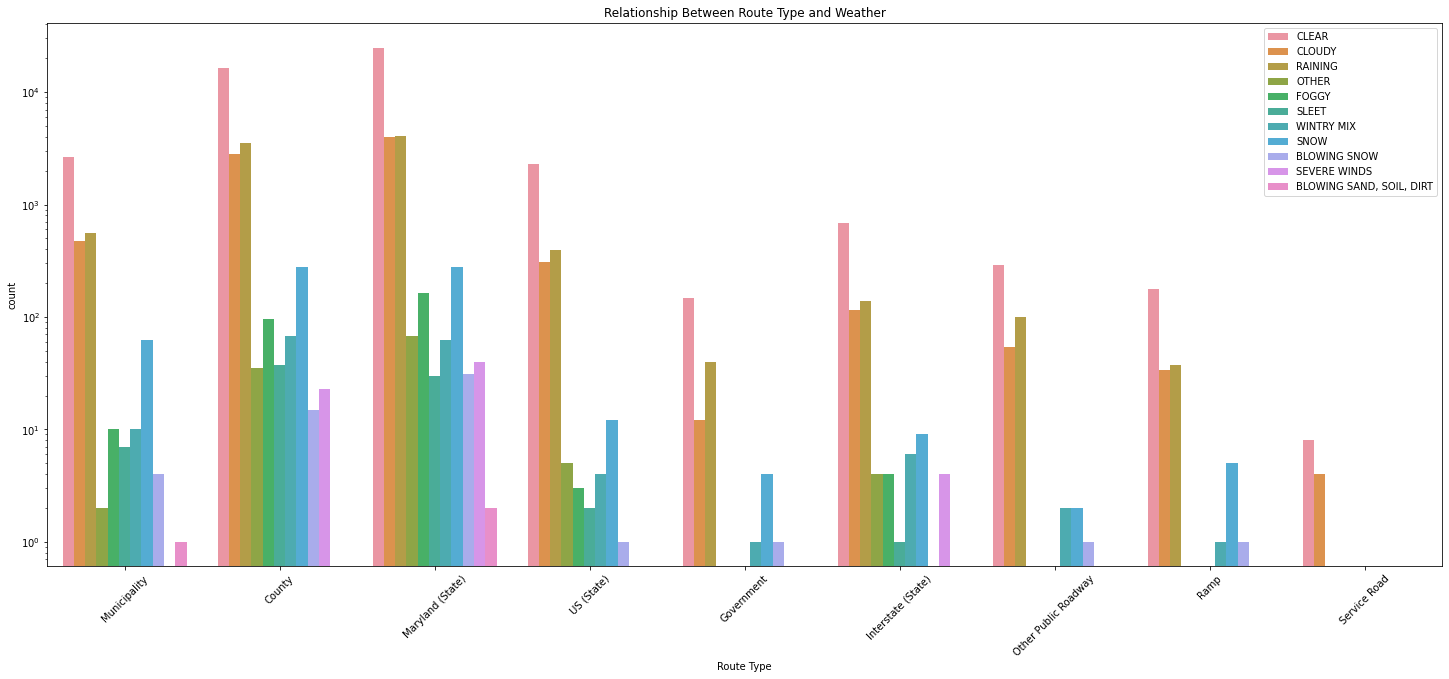

In [58]:
#Relationship between route type and weather
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x = df['Route Type'], hue = df['Weather'], data = df)
plt.title('Relationship Between Route Type and Weather')
ax.set_yscale("log")
ax.legend(loc='upper right', bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(rotation=45)
plt.show()

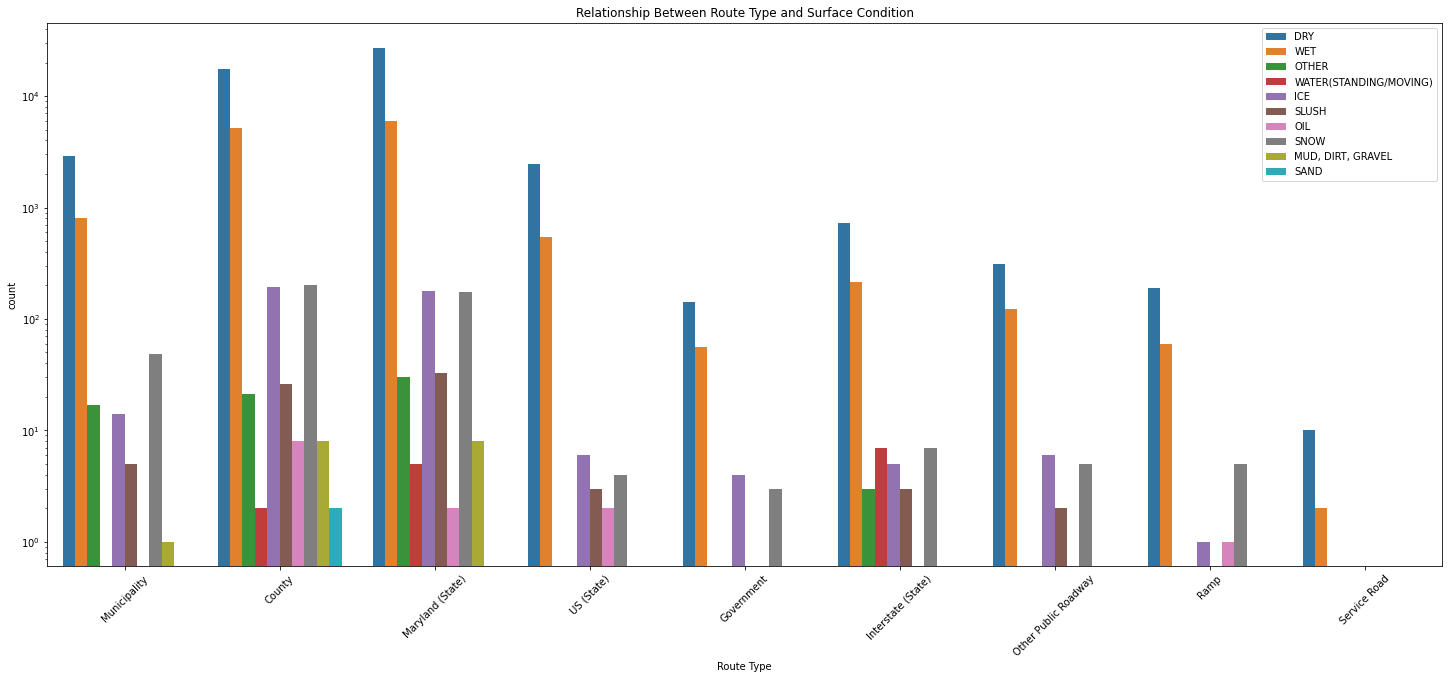

In [59]:
#Relationship between route type and surface condition
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x = df['Route Type'], hue = df['Surface Condition'], data = df)
plt.title('Relationship Between Route Type and Surface Condition')
ax.set_yscale("log")
ax.legend(loc='upper right', bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(rotation=45)
plt.show()

In [61]:
route_and_condition = df[['Route Type','Surface Condition','Weather']]


,Route Type,Surface Condition,Weather
0,Municipality,DRY,CLEAR
1,County,DRY,CLOUDY
2,Maryland (State),DRY,CLEAR
3,Maryland (State),DRY,CLEAR
4,US (State),DRY,CLEAR


In [ ]:
ggballoonplot(housetasks, fill = "value")+ 
scale_fill_viridis_c(option = "C")